# Buổi 10: CTDL Tree và Graph

## 1. Tree
- **Tree** là một CTDL có tính phân cấp. Một số ví dụ của Tree

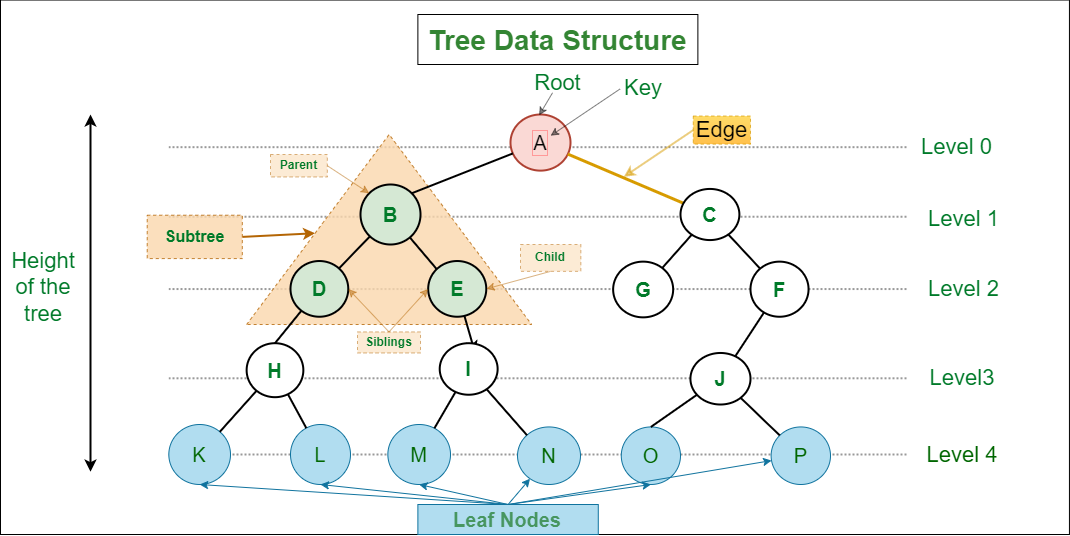

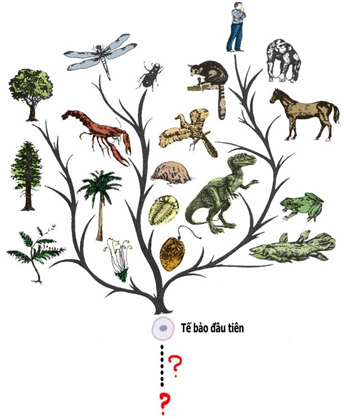

Từ các ví dụ trên, ta có thể rút ra một số **tính chất** của cây:
- Cây bắt đầu từ phần tử gốc. Phần tử này có thể không có hoặc có nhiều phần tử con
- Mỗi phần từ nằm sau gốc cũng có thể không có hoặc có nhiều con, nhưng mỗi phần tử đều chỉ có đúng một cha.
- Các phần tử không có phần tử con được gọi là phần tử lá.
- Mỗi phần tử con được gọi là node.

Ứng dụng: 
- Lưu trữ cây thư mục trên các hệ thống: Windows, Linux, Macos
- Lưu trữ dữ liệu có tính chất phân cấp: cấu trúc cấp bậc trong một tổ chức, dữ liệu dạng HTML, XML, JSON,...
- Hỗ trợ thực hiện các thuật toán
+ Tính toán giá trị của biểu thức
+ Tìm kiếm trên cây nhị phân
+ Biên dịch code của ngôn ngữ lập trình thành mã mãy
+ Các thuật toán machine learning trên cây

### Code
Python không hỗ trợ cấu trúc dữ liệu sẵn có dạng tree. Tuy nhiên, ta có thể tự cài đặt tree theo một cách đơn giản như sau:


In [1]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []
        
## Tạo ra một cây cơ bản
root = TreeNode("html")
head = TreeNode("head")
body = TreeNode("body")
meta = TreeNode("meta")
title = TreeNode("title")

## Thiết lập các node con với cha
root.children = [head, body]
head.children = [meta, title]

print("Children of root: {}".format(root.children))
print("Children of head: {}".format(head.children))
print("Children of body: {}".format(body.children))


        


Children of root: [<__main__.TreeNode object at 0x107e7f0e0>, <__main__.TreeNode object at 0x107e7d370>]
Children of head: [<__main__.TreeNode object at 0x107e7f290>, <__main__.TreeNode object at 0x107e7f0b0>]
Children of body: []


In [2]:
def traverse_tree(tree_node, level = 0): ## Truyền vào gốc muốn duyệt
    print("--"*level, end="")
    print("{}".format(tree_node.data))
    
    
    for node in tree_node.children: 
        traverse_tree(node, level+1) # Đệ quy để duyệt tiếp

traverse_tree(root)

html
--head
----meta
----title
--body


## 2. Graph (Đồ Thị)
**Graph** là một cấu trúc dữ liệu gồm các đỉnh (vertex) được nối với nhau bởi các cạnh (edge).

Tính chất
- Mỗi cạnh của một graph kết nối đúng hai đỉnh với nhau. Hai đỉnh được nối bằng cạnh được gọi là *liền kề nhau*
- Một đỉnh có thể được kết nối với nhiều đỉnh khác hoặc không kết nối với đỉnh nào.

Ứng dụng:
Do cấu tạo và tính chất như trên, Graph được dùng để thể hiện dữ liệu có dạng mạng lưới: 
- Bản đồ đường bộ như Google Maps: mỗi còn đường là một cạnh, mỗi giao lộ là một đỉnh
- Bản đồ đường đường dây điện, đường ống nước ,... 
- Quan hệ bạn bè trên mạng xã hội như: Facebook, mỗi quan hệ bạn bè là một cạnh, mỗi tài khoản là một đỉnh.
- Kết nói giữa các máy tính cùng mạng LAN, giữa các server internet.

Lưu trữ
- Có nhiều mô hình khác nhau để lưu trữ một đồ thị. Một trong những cách thông dụng là lưu trữ theo dạng **danh sách kề**: Từ mỗi đỉnh, ta lưu trữ tất cả các đỉnh liền kề với nó

VD: Ta lưu trữ đồ thị trong hình dưới đây theo dạng danh sách kề trong Python như sau:

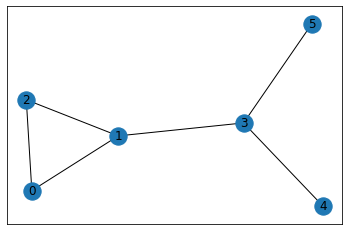

In [ ]:
graph = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1],
    3: [1, 4, 5],
    4: [3],
    5: [3],
    6: [7],
    7: [6]
}

Nhận xét: Như vậy, ở một đỉnh bất kỳ như đỉnh 3, ta tìm được ba đỉnh liền kề với 3 là: 1, 4, 5

Yêu cầu: Thực hiện kiểm tra hai đỉnh A và B bất kỳ có kết nối với nhau hay không bằng cách đi từ A, lần theo các cạnh để đi đến các đỉnh liền kề cho đến khi tìm được B. Nếu đã duyệt qua tất cả các đỉnh có thể từ A mà vẫn không tìm được B, ta kết luận A và B không kết nối với nhau.